<a href="https://colab.research.google.com/github/swapnamoy007/ML-ASSIGNMENT/blob/main/Final%20Exam%20(Module9)/Final_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Packages

Note that installing both Mendeleev and Materials Project is a bit tricky. Please follow the instructions in the markdown fields.

In [2]:
!pip install mp_api
!pip install -U mendeleev

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.7 MB/s eta 0:00:00
   ━━━

*** Do not restart the runtime here***

# Mendeleev

This is the link to original Mendeleev package: https://github.com/lmmentel/mendeleev/


**Now restart the runtime and run the code below**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mendeleev
import sqlalchemy

from mendeleev.fetch import fetch_table

In [4]:
from mendeleev import Si, Fe, O
print("Si's name: ", Si.name)
print("Fe's atomic number:", Fe.atomic_number)
print("O's atomic weight: ", O.atomic_weight)

Si's name:  Silicon
Fe's atomic number: 26
O's atomic weight:  15.999


In [5]:
# what modules are in mendeleev
# dir(mendeleev)

In [6]:
# mendeleev.models.IonicRadius

In [7]:
ptable = fetch_table('elements')
ptable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   annotation                     118 non-null    object 
 1   atomic_number                  118 non-null    int64  
 2   atomic_radius                  90 non-null     float64
 3   atomic_volume                  91 non-null     float64
 4   block                          118 non-null    object 
 5   density                        118 non-null    float64
 6   description                    109 non-null    object 
 7   dipole_polarizability          117 non-null    float64
 8   electron_affinity              77 non-null     float64
 9   electronic_configuration       118 non-null    object 
 10  evaporation_heat               88 non-null     float64
 11  fusion_heat                    75 non-null     float64
 12  group_id                       90 non-null     flo

In [8]:
cols = ['atomic_number', 'symbol', 'atomic_radius', 'en_pauling', 'block', 'vdw_radius_mm3']
ptable[cols].head()

,atomic_number,symbol,atomic_radius,en_pauling,block,vdw_radius_mm3
0,1,H,25.0,2.20,s,162.0
1,2,He,120.0,NaN,s,153.0
2,3,Li,145.0,0.98,s,255.0
3,4,Be,105.0,1.57,s,223.0
4,5,B,85.0,2.04,p,215.0


In [9]:
df_elements = ptable[cols]
df_elements.head()

,atomic_number,symbol,atomic_radius,en_pauling,block,vdw_radius_mm3
0,1,H,25.0,2.20,s,162.0
1,2,He,120.0,NaN,s,153.0
2,3,Li,145.0,0.98,s,255.0
3,4,Be,105.0,1.57,s,223.0
4,5,B,85.0,2.04,p,215.0


Now we have access to the properties of elements

# Materials Project API

This part of the notebook shows how to curate data from Materials Project along with an example to send a query.

- Notebook prepared by Ayana Ghosh

- Email: research.aghosh@gmail.com

Import libraries

In [10]:
#using new version of Materials Project API
from mp_api.client import MPRester
import pandas as pd

Check which properties are available

- https://github.com/materialsproject/mapidoc/tree/master/materials
- https://next-gen.materialsproject.org/api

In [11]:
MPRestermpr = MPRester("Fyy195X4eENbE9KHTlkZK0lzVSREjq7v")
MPRestermpr.materials.available_fields

['builder_meta',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'material_id',
 'structure',
 'deprecated',
 'deprecation_reasons',
 'initial_structures',
 'task_ids',
 'deprecated_tasks',
 'calc_types',
 'last_updated',
 'created_at',
 'origins',
 'warnings',
 'task_types',
 'run_types',
 'entries']

Example query that gives material systems with following criteria:
insulating, stable, direct band gap and combines it into a dataframe

In [12]:
docs = MPRestermpr.materials.summary.search(is_metal=False,is_stable=True,
                          all_fields=False,is_gap_direct=True,theoretical=False,
                          fields=["material_id","structure","e_total", 'initial_structures',
                                  "symmetry","formula_pretty","formation_energy_per_atom","energy_above_hull"])

Retrieving SummaryDoc documents:   0%|          | 0/3682 [00:00<?, ?it/s]

In [13]:
# Experiment with what is contained in these fields
# docs[2]

In [14]:
df = pd.DataFrame()
df["mpids"] = [doc.material_id for doc in docs]
df["struc"] = [doc.structure for doc in docs]
df["crystal_system"]    = [doc.symmetry.crystal_system for doc in docs]
df["e_total"]                       = [doc.e_total for doc in docs]
df["pretty_formula"]                = [doc.formula_pretty for doc in docs]
df["formation_energy_per_atom"]     = [doc.formation_energy_per_atom for doc in docs]
df["energy_above_hull"]             = [doc.energy_above_hull for doc in docs]

In [15]:
df.head()

,mpids,struc,crystal_system,e_total,pretty_formula,formation_energy_per_atom,energy_above_hull
0,mp-30274,"[[3.23277773 3.23277773 6.29799073] Ac, [1.077...",Tetragonal,NaN,AcBrO,-3.362475,0.0
1,mp-18125,"[[5.48781898 4.9540164 2.67787168] Ag, [ 0. ...",Monoclinic,NaN,Ag(AuF4)2,-1.203594,0.0
2,mp-567334,"[[7.87262662 7.87262662 7.87262662] Ag, [ 7.87...",Cubic,NaN,Ag(BCl)6,-0.736951,0.0
3,mp-1195193,"[[ 0.1486133 25.49510107 0.1398944 ] Ag, [ 0...",Monoclinic,NaN,Ag12Sn7H16(Se11N2)2,-0.480199,0.0
4,mp-23558,"[[5.88286112 4.72844634 2.42596894] Ag, [4.524...",Orthorhombic,26.531189,Ag2BiO3,-0.923417,0.0


Now, let's import a different object.

In [16]:
docs2 = MPRestermpr.materials.summary.search(is_metal=False,is_stable=True,
                          all_fields=False,is_gap_direct=False,theoretical=False,
                          fields=["material_id","elements","nelements", "symmetry",
                                  "composition","volume", "density","formula_anonymous","formation_energy_per_atom","energy_above_hull"])

Retrieving SummaryDoc documents:   0%|          | 0/8677 [00:00<?, ?it/s]

In [17]:
df2 = pd.DataFrame()
df2["mpids"] = [doc.material_id for doc in docs2]
df2["elements"] = [doc.elements for doc in docs2]
df2["nelements"] = [doc.nelements for doc in docs2]
df2["composition"]  = [doc.composition for doc in docs2]
df2["volume"] = [doc.volume for doc in docs2]
df2["density"] = [doc.density for doc in docs2]
df2["crystal_system"]    = [doc.symmetry.crystal_system for doc in docs2]
df2["energy_above_hull"] = [doc.energy_above_hull for doc in docs2]
df2["formula_anonymous"] = [doc.formula_anonymous for doc in docs2]
df2["formation_energy_per_atom"] = [doc.formation_energy_per_atom for doc in docs2]
df2["energy_above_hull"] = [doc.energy_above_hull for doc in docs2]

In [18]:
df2.tail()

,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom
8672,mp-1102830,"[S, Tl, Zr]",3,"(Zr, Tl, S)",312.784505,6.330170,Monoclinic,0.0,AB2C3,-1.228971
8673,mp-7049,"[Cu, S, Tl, Zr]",4,"(Zr, Tl, Cu, S)",264.615543,5.714885,Orthorhombic,0.0,ABCD3,-1.236513
8674,mp-7050,"[Cu, Se, Tl, Zr]",4,"(Zr, Tl, Cu, Se)",289.745446,6.831766,Orthorhombic,0.0,ABCD3,-1.092194
8675,mp-30997,"[F, Tl, Zr]",3,"(Zr, Tl, F)",418.151318,6.204504,Monoclinic,0.0,ABC5,-3.490225
8676,mp-554326,"[O, V, Zr]",3,"(Zr, V, O)",714.217756,2.837427,Cubic,0.0,AB2C7,-2.814241


# Exploring Element Space

Now, let's select only the binary compounds from the dataframe df2

In [19]:
df_AB = df2[df2['formula_anonymous'].isin(['AB'])]
df_AB.head()

,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975


The actual entries in the table are fairly complex objects in the Materials Project format. Rather then digging deep into it, we will simply convert it into string object and create two columns that contain the element symbols.

In [20]:
df_AB.loc[:, 'Ell_Val'] = df_AB['elements'].astype(str)

# Remove "Element" and split into two columns 'x' and 'y'
df_AB['Ell_Val'] = df_AB['Ell_Val'].str.replace('Element', '')
df_AB[['x', 'y']] = df_AB['Ell_Val'].str.strip('[]').str.split(', ', expand=True)

# Convert the 'x' and 'y' columns to strings if needed
df_AB['x'] = df_AB['x'].astype(str)
df_AB['y'] = df_AB['y'].astype(str)

df_AB.head()

<ipython-input-20-f77b3c512794>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB.loc[:, 'Ell_Val'] = df_AB['elements'].astype(str)
<ipython-input-20-f77b3c512794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['Ell_Val'] = df_AB['Ell_Val'].str.replace('Element', '')
<ipython-input-20-f77b3c512794>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom,Ell_Val,x,y
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400,"[ Ag, Br]",Ag,Br
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440,"[ Ag, Cl]",Ag,Cl
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043,"[ Al, As]",Al,As
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249,"[ Al, P]",Al,P
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975,"[ Al, Sb]",Al,Sb


Now, let's create an additional column and set the values there as Pauling electronegativity for the element in column 'x'

In [21]:
df_AB['El1_pauling'] = None

for index, row in df_AB.iterrows():
    z = row['x'].strip()
    matching_row = df_elements[df_elements['symbol'] == z]
    if not matching_row.empty:
        electro_value = matching_row['en_pauling'].values[0]
        df_AB.at[index, 'El1_pauling'] = electro_value

<ipython-input-21-a972239474c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['El1_pauling'] = None


And do the same for the element in column 'y'

In [22]:
df_AB['El2_pauling'] = None

for index, row in df_AB.iterrows():
    z = row['y'].strip()
    matching_row = df_elements[df_elements['symbol'] == z]

    if not matching_row.empty:
        electro_value = matching_row['en_pauling'].values[0]
        df_AB.at[index, 'El2_pauling'] = electro_value

df_AB.head()

<ipython-input-22-37ff43e2a9d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['El2_pauling'] = None


,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom,Ell_Val,x,y,El1_pauling,El2_pauling
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400,"[ Ag, Br]",Ag,Br,1.93,2.96
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440,"[ Ag, Cl]",Ag,Cl,1.93,3.16
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043,"[ Al, As]",Al,As,1.61,2.18
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249,"[ Al, P]",Al,P,1.61,2.19
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975,"[ Al, Sb]",Al,Sb,1.61,2.05


Finally, let's create column crystal_system2 that will contain the data on the crystal system.

In [23]:
'''
df_AB['crystal_system2'] = df_AB['crystal_system'].str.extract(r"'(.*?)'")
df_AB.head()
'''

'\ndf_AB[\'crystal_system2\'] = df_AB[\'crystal_system\'].str.extract(r"\'(.*?)\'")\ndf_AB.head()\n'

In [24]:
df_AB['crystal_system2'] = None

# Iterate through each row and apply str() to 'crystal_system' column
for index, row in df_AB.iterrows():
    elt = str(row['crystal_system'])
    df_AB.at[index, 'crystal_system2'] = elt

df_AB.head()

<ipython-input-24-9563d4eec0dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['crystal_system2'] = None


,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom,Ell_Val,x,y,El1_pauling,El2_pauling,crystal_system2
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400,"[ Ag, Br]",Ag,Br,1.93,2.96,Cubic
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440,"[ Ag, Cl]",Ag,Cl,1.93,3.16,Cubic
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043,"[ Al, As]",Al,As,1.61,2.18,Cubic
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249,"[ Al, P]",Al,P,1.61,2.19,Cubic
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975,"[ Al, Sb]",Al,Sb,1.61,2.05,Cubic


Now, let's see what crystal systems are there

In [25]:
df_AB['crystal_system2'].values

array(['Cubic', 'Cubic', 'Cubic', 'Cubic', 'Cubic', 'Monoclinic',
       'Monoclinic', 'Monoclinic', 'Cubic', 'Cubic', 'Cubic', 'Cubic',
       'Cubic', 'Cubic', 'Cubic', 'Orthorhombic', 'Cubic', 'Hexagonal',
       'Cubic', 'Cubic', 'Cubic', 'Orthorhombic', 'Orthorhombic', 'Cubic',
       'Cubic', 'Cubic', 'Cubic', 'Orthorhombic', 'Orthorhombic', 'Cubic',
       'Orthorhombic', 'Cubic', 'Cubic', 'Cubic', 'Cubic', 'Hexagonal',
       'Hexagonal', 'Monoclinic', 'Monoclinic', 'Orthorhombic',
       'Trigonal', 'Orthorhombic', 'Tetragonal', 'Tetragonal',
       'Tetragonal', 'Tetragonal', 'Orthorhombic', 'Trigonal', 'Cubic',
       'Monoclinic', 'Orthorhombic', 'Cubic', 'Orthorhombic',
       'Orthorhombic', 'Monoclinic', 'Cubic', 'Tetragonal', 'Hexagonal',
       'Monoclinic', 'Hexagonal', 'Cubic', 'Tetragonal', 'Orthorhombic',
       'Hexagonal', 'Monoclinic', 'Cubic', 'Cubic', 'Monoclinic', 'Cubic',
       'Cubic', 'Hexagonal', 'Monoclinic', 'Cubic', 'Orthorhombic',
       'Monoclinic'

And plot the crystal system as a function of Pauling electronegativities of individual elements.

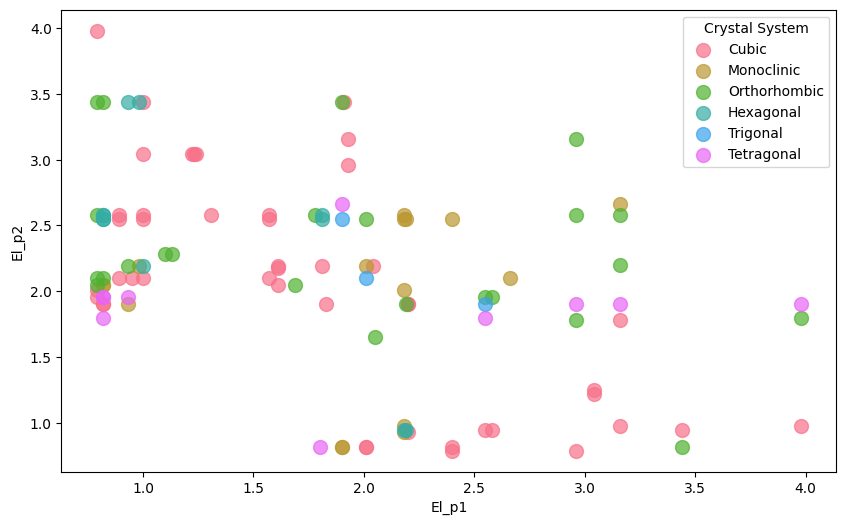

In [26]:
import seaborn as sns

unique_entries = df_AB['crystal_system2'].unique()

plt.figure(figsize=(10, 6))
palette = sns.color_palette('husl', len(unique_entries))

# Create a scatterplot with different symbols for each unique entry
for i, entry in enumerate(unique_entries):
    subset = df_AB[df_AB['crystal_system2'] == entry]
    plt.scatter(subset['El1_pauling'], subset['El2_pauling'], label=entry, marker='o', s=100, alpha=0.7, color=palette[i])

# Add labels and legend
plt.xlabel('El_p1')
plt.ylabel('El_p2')
plt.legend(title='Crystal System')

# Show the plot
plt.show()

# Final Exam - I

In this part of exam, we will try to understand what properties of elements control the symmetry of the crystal structure of binary compounds.

I.1. Build the descriptor vector for each element based on the Mendeleev imports. For example, you can pick several elements from the list of (atomic_number, atomic_radius, dipole_polarizability,        electron_affinity, vdw_radius, covalent_radius_cordero, covalent_radius_pyykko, en_pauling, en_allen, covalent_radius_bragg, dipole_polarizability_unc, pettifor_number, glawe_number). Choose 4 - 8 descriptors and create dataframe for these descriptors for each element.

Descriptor DataFrame:
    atomic_number  atomic_radius  dipole_polarizability  electron_affinity  \
0              1           25.0                4.50711           0.754195   
1              2          120.0                1.38375         -19.700000   
2              3          145.0              164.11250           0.618049   
3              4          105.0               37.74000          -2.400000   
4              5           85.0               20.50000           0.279723   

   vdw_radius  covalent_radius_cordero  en_pauling  pettifor_number symbol  
0       110.0                     31.0        2.20            103.0      H  
1       140.0                     28.0       -1.00              1.0     He  
2       182.0                    128.0        0.98             12.0     Li  
3       153.0                     96.0        1.57             77.0     Be  
4       192.0                     84.0        2.04             86.0      B  

Correlation Matrix:
                          atomi

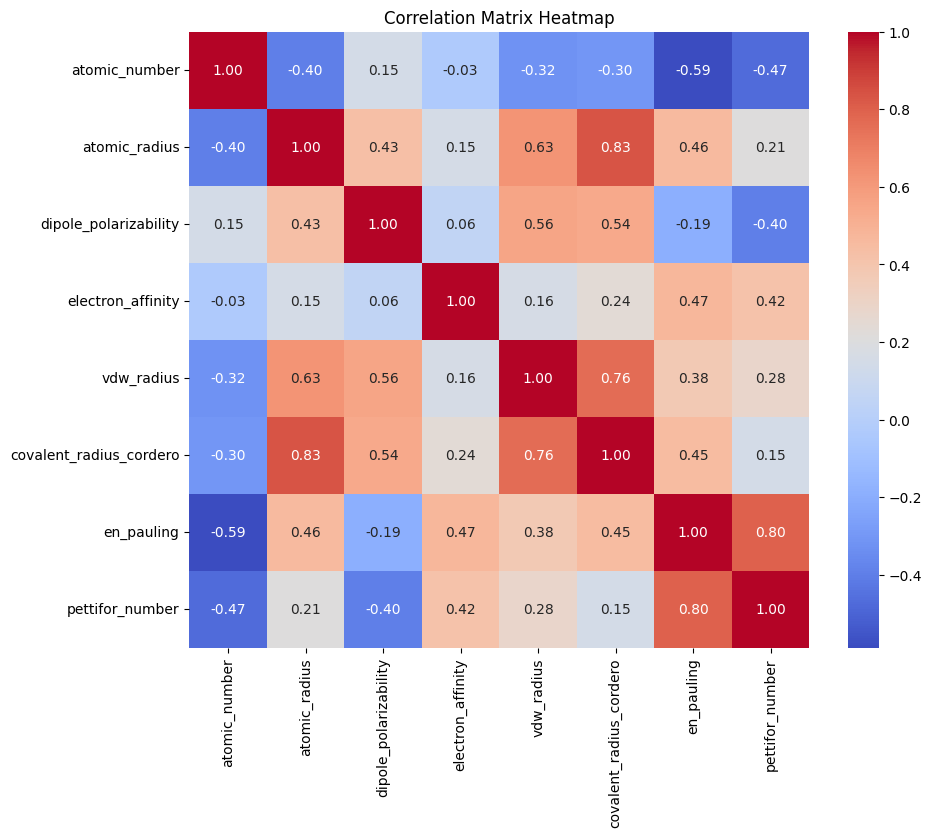

In [28]:
# Import necessary libraries
from mendeleev.fetch import fetch_table
from mendeleev import element
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Choose descriptors
descriptors = [
    "atomic_number",
    "atomic_radius",
    "dipole_polarizability",
    "electron_affinity",
    "vdw_radius",
    "covalent_radius_cordero",
    "en_pauling",
    "pettifor_number"
]

# Step 2: Fetch the periodic table
ptable = fetch_table("elements")  # Retrieve elements as a DataFrame

# Step 3: Build the descriptor DataFrame
data = []
for symbol in ptable["symbol"]:
    try:
        el = element(symbol)  # Retrieve element object by its symbol
        descriptor_values = {desc: getattr(el, desc, None) for desc in descriptors}  # Get descriptor values
        descriptor_values["symbol"] = symbol  # Add element symbol
        data.append(descriptor_values)
    except Exception as e:
        print(f"Error processing element {symbol}: {e}")

# Convert the data to a DataFrame
df_descriptors = pd.DataFrame(data)

# Step 4: Handle missing values
df_descriptors.fillna(value={"atomic_radius": -1, "dipole_polarizability": -1,
                              "electron_affinity": -1, "vdw_radius": -1,
                              "covalent_radius_cordero": -1, "en_pauling": -1,
                              "pettifor_number": -1}, inplace=True)

# Step 5: Save and display the descriptor DataFrame
df_descriptors.to_csv("element_descriptors_advanced.csv", index=False)

print("Descriptor DataFrame:\n", df_descriptors.head())

# Step 7: Analyze correlations between numerical descriptors
correlation_matrix = df_descriptors.drop(columns="symbol").corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# (Optional) Filter for specific elements of interest
elements_in_use = ["Si", "O", "C", "N", "Al", "Fe", "Mg"]  # Example subset
df_filtered = df_descriptors[df_descriptors["symbol"].isin(elements_in_use)]
print("\nFiltered Descriptor DataFrame:\n", df_filtered)

# Save the filtered dataset and correlation matrix
df_filtered.to_csv("filtered_element_descriptors.csv", index=False)
correlation_matrix.to_csv("correlation_matrix_advanced.csv")

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


I.2. Explain the choice of descriptors from the point of view of materials science. Why do you think the properties you selected should matter (feel free to discuss with ChatGPT)

Answer-
From the perspective of influence on an element's physical, chemical, and electronic properties, these factors have their crucial roles:

**Atomic Number**: Fundamental identifier affecting electronic configuration and periodic trends.
**Atomic Radius**: Determines lattice structures, packing, and bonding.
**Dipole Polarizability**: Key for dielectric behavior and intermolecular forces; measures the ease with which the electron cloud of an atom can be distorted by an electric field.
**Electron Affinity**: Governs redox behavior and dopant properties in semiconductors.
**van der Waals Radius**: Important for cohesion, adsorption, and catalytic interactions.
**Covalent Radius**: Influences bond lengths, strength, and material rigidity.
**Electronegativity (Pauling)**: Predicts bond type and reactivity.
**Pettifor Number**: Synthetic property that encapsulates trends across Captures periodic trends, aiding in phase stability and alloy design.




I.3. Explain the choice of descriptors from the point of view of data science. E.g.:
- Is there benefit in taking more simialr descriptors (e.g. different versions of the VdW radius), or not?
- What about augmenting the descriptor vector by symbol of the element? Can it improve prediction?

Answer:
From a data science perspective, descriptor selection balances informativeness and redundancy to maximize predictive power and model interpretability:

**Redundancy vs. Diversity**: Including multiple similar descriptors (e.g., different versions of van der Waals radius) may not add significant value, as they are often highly correlated. Instead, they can introduce noise, overfit the model, or inflate computational costs. Feature selection techniques like PCA or mutual information can identify and reduce redundant features.

**Symbol of the Element**: Adding the symbol of the element as a categorical feature can improve prediction for models that leverage symbolic information (e.g., tree-based or embeddings in deep learning). However, this approach might add complexity and is generally less effective for numerical models unless the symbol represents meaningful, structured groupings (e.g., periods or groups in the periodic table).

**Descriptor Diversity**: Including diverse descriptors like electronic, geometric, and periodic trends ensures the model captures a broad range of influences on material properties. This variety improves model generalizability across different material systems.

**Trade-offs in Augmentation**: Over-augmentation of the descriptor vector with similar or irrelevant features can lead to overfitting and reduced interpretability. Conversely, careful augmentation (e.g., categorical or one-hot encoded features for chemical groups) can enhance the model's ability to generalize patterns.

I.4. Chose the unsupervised linear analysis method and explore the factors that control the crystal structure in the corresponding reduced dimensinality space. Note that you need to come up with some startegy for combining the information from both elements. For example:
- You can choose PCA and use the PCA1 component from first vector and PCA1 component from second vector
- Or you can concatenate the descriptors and analyze the combined descriptors.

I.5. Choose the supervised linear analysis method and identify the factors that control crystal strucutre.

I.6. Choose the decision tree based method and identify the factors that control the crystal structure.

I.7. Write the neural network based classifier that predicts the crystal structure based on the descriptors that you have chosen. Again, here you can choose one of multiple startegies. For example:

 - you can concatnate descriptors, or

-  build network that has two heads, then separate depe layer for each, then concatenation and then prediciton head.

I.8. Calculate the ROC curve

I.9. Calculate the confusion matrix

I.10. What are the limitations of this analysis? How would you improve this predictions?

Answer: